# German Credit Risk Classification using Tree based Algorithms

## Context

The dataset contains 1000 entries with 62 features prepared by Professor Dr. Hans Hofmann of the University of Hamburg, and is publicly available at the UCI Machine Learning Repository

This dataset has two classes to describe the worthiness of a personal loan: **"Good"** or **"Bad"**. There are features related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these features are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

### We will be using decision trees to classify the loans into good or bad category

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import random 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc

%matplotlib inline

In [4]:
credit = pd.read_csv("./datasets/GermanCredit.csv")
credit.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Duration                                1000 non-null   int64 
 1   Amount                                  1000 non-null   int64 
 2   InstallmentRatePercentage               1000 non-null   int64 
 3   ResidenceDuration                       1000 non-null   int64 
 4   Age                                     1000 non-null   int64 
 5   NumberExistingCredits                   1000 non-null   int64 
 6   NumberPeopleMaintenance                 1000 non-null   int64 
 7   Telephone                               1000 non-null   int64 
 8   ForeignWorker                           1000 non-null   int64 
 9   Class                                   1000 non-null   object
 10  CheckingAccountStatus.lt.0              1000 non-null   int64 
 11  Check

In [6]:
credit.describe()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.596000,0.963000,0.274000,...,0.13900,0.047000,0.814000,0.179000,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.490943,0.188856,0.446232,...,0.34612,0.211745,0.389301,0.383544,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


We have a mix of categorical and continuous variables.

The target variable `Class` is a categorical. Let's explore it.

In [7]:
credit['Class'].value_counts()

Good    700
Bad     300
Name: Class, dtype: int64

The data set is not balanced, so we need to take care of that. 

Lets convert the strings into numerical values for the target. `{"Good" : 1, "Bad" : 0}`

In [8]:
transform = {"Class": {"Good" : 1, "Bad" : 0}}

credit.replace(transform, inplace=True)
credit['Class'].value_counts()

1    700
0    300
Name: Class, dtype: int64

In [9]:
for column in credit:
    if credit[column].max() > 1:
        print('{}: {}'.format(column, credit[column].max()))

Duration: 72
Amount: 18424
InstallmentRatePercentage: 4
ResidenceDuration: 4
Age: 75
NumberExistingCredits: 4
NumberPeopleMaintenance: 2


`Duration`, `Amount` & `Age` are the only columns with numerical values.

Let's take a look a the distributions of the continuous variables to check for outliers etc.

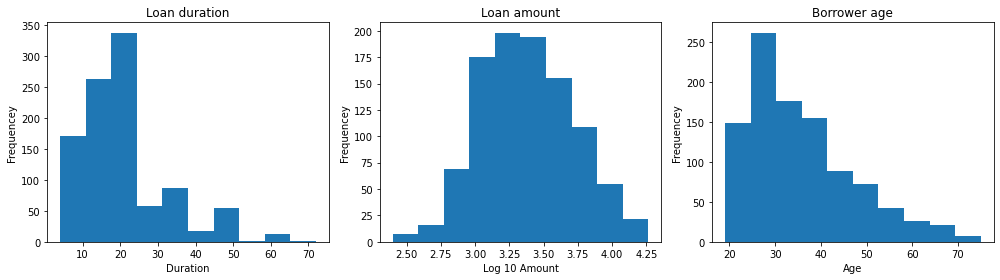

In [10]:
plt.subplots(1,3, figsize=(14,4))

plt.subplot(1,3, 1)
plt.hist(credit.Duration)
plt.title("Loan duration")
plt.xlabel("Duration")
plt.ylabel("Frequencey")

plt.subplot(1,3, 2)
plt.hist(np.log10(credit.Amount))
plt.title("Loan amount")
plt.xlabel("Log 10 Amount")
plt.ylabel("Frequencey")

plt.subplot(1,3, 3)
plt.hist(credit.Age)
plt.title("Borrower age")
plt.xlabel("Age")
plt.ylabel("Frequencey")

plt.tight_layout()
plt.show()

In [11]:
x = credit.drop(['Class'], axis = 1)
y = credit['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=5)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(750, 61) (250, 61) (750,) (250,)


### DecisionTreeClassifier

In [12]:
model_1 = DecisionTreeClassifier()
model_1.fit(x_train, y_train)

y_predict_train_1 = model_1.predict(x_train)
y_predict_test_1 = model_1.predict(x_test)

print(classification_report(y_predict_train_1, y_train))
print(classification_report(y_predict_test_1, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           1       1.00      1.00      1.00       520

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

              precision    recall  f1-score   support

           0       0.47      0.39      0.43        84
           1       0.72      0.78      0.75       166

    accuracy                           0.65       250
   macro avg       0.59      0.58      0.59       250
weighted avg       0.63      0.65      0.64       250



In [13]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [14]:
params = {'max_leaf_nodes': list(range(2, 100)),
          'max_depth': list(range(2, 10)),
          }

grid_search = GridSearchCV(model_1, 
                          param_grid = params,
                          cv = 10)
start = time()
grid_search.fit(x_train, y_train)
print((time()-start)/60)

1.8323390046755472


In [15]:
grid_search.best_params_

{'max_depth': 9, 'max_leaf_nodes': 13}

In [16]:
model_2 = DecisionTreeClassifier(max_depth= 8, max_leaf_nodes= 13)
model_2.fit(x_train, y_train)

y_predict_train_2 = model_2.predict(x_train)
y_predict_test_2 = model_2.predict(x_test)

print(classification_report(y_predict_train_2, y_train))
print(classification_report(y_predict_test_2, y_test))

              precision    recall  f1-score   support

           0       0.33      0.89      0.49        87
           1       0.98      0.77      0.86       663

    accuracy                           0.78       750
   macro avg       0.66      0.83      0.67       750
weighted avg       0.91      0.78      0.82       750

              precision    recall  f1-score   support

           0       0.23      0.47      0.31        34
           1       0.90      0.75      0.82       216

    accuracy                           0.71       250
   macro avg       0.56      0.61      0.56       250
weighted avg       0.81      0.71      0.75       250



#### Hypeparameter Tuning

Lets check the hyperparameter individually.

0.03258796532948812


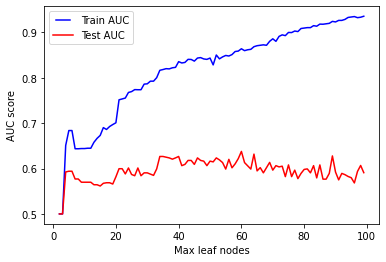

In [17]:
max_leaf_nodes = list(range(2, 100))

train_results = []
test_results = []

start = time()
for max_leaf_node in max_leaf_nodes:
    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaf_node)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
    
print((time()-start)/60)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_leaf_nodes, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_leaf_nodes, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Max leaf nodes')
plt.show()

0.010412283738454183


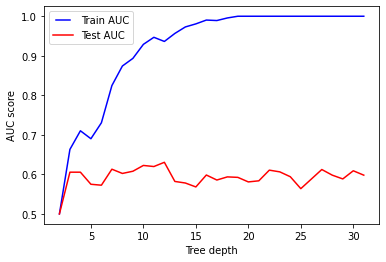

In [18]:
max_depths = list(range(2, 32))

train_results = []
test_results = []

from sklearn.metrics import roc_curve, auc

start = time()
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
print((time()-start)/60)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

0.003333000342051188


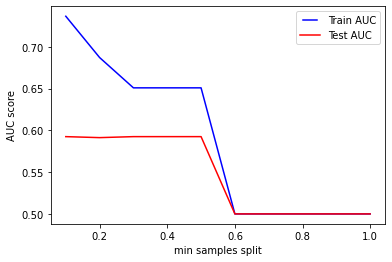

In [19]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []

start = time()
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
print((time()-start)/60)

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

3.2620460987091064


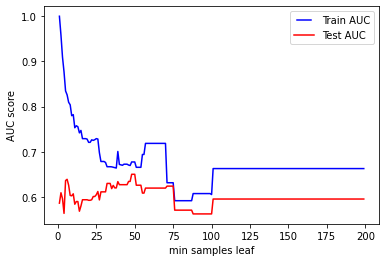

In [20]:
min_samples_leafs = list(range(1,200))
train_results = []
test_results = []

start = time()
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

print(time()-start)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [21]:
#model3
params = {'max_leaf_nodes': list(range(40, 80)),
          'max_depth': list(range(5, 15)),
          'min_samples_split' : np.linspace(0.1, 0.4, 4, endpoint=True),
          'min_samples_leaf' : list(range(50, 125))
          }

grid_search_2 = RandomizedSearchCV(model_1, 
                          param_distributions = params,
                          n_iter = 5000,
                          scoring=make_scorer(metrics.average_precision_score))
start = time()
model_3 = grid_search_2.fit(x_train, y_train)
print((time()-start)/60)

5.163639911015829


In [22]:
results_3 = pd.DataFrame(model_3.cv_results_).dropna()
results_3.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008031,0.004273,0.001972,0.003944,0.2,119,48,5,"{'min_samples_split': 0.2, 'min_samples_leaf':...",0.781029,0.780528,0.765824,0.742185,0.772186,0.768350,0.014246,33
1,0.005866,0.003478,0.002052,0.002514,0.1,90,46,9,"{'min_samples_split': 0.1, 'min_samples_leaf':...",0.781029,0.780528,0.724920,0.742185,0.772186,0.760170,0.022627,2644
2,0.005001,0.004578,0.004062,0.004128,0.3,65,49,13,"{'min_samples_split': 0.30000000000000004, 'mi...",0.781029,0.767813,0.713052,0.742185,0.723434,0.745503,0.025733,4011
3,0.005884,0.003581,0.004012,0.003753,0.4,95,41,6,"{'min_samples_split': 0.4, 'min_samples_leaf':...",0.781029,0.780528,0.765824,0.742185,0.772186,0.768350,0.014246,33
4,0.006569,0.002247,0.004499,0.003277,0.4,66,62,13,"{'min_samples_split': 0.4, 'min_samples_leaf':...",0.781029,0.780528,0.713052,0.742185,0.772186,0.757796,0.026493,3046


In [23]:
results_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_fit_time            5000 non-null   float64
 1   std_fit_time             5000 non-null   float64
 2   mean_score_time          5000 non-null   float64
 3   std_score_time           5000 non-null   float64
 4   param_min_samples_split  5000 non-null   object 
 5   param_min_samples_leaf   5000 non-null   object 
 6   param_max_leaf_nodes     5000 non-null   object 
 7   param_max_depth          5000 non-null   object 
 8   params                   5000 non-null   object 
 9   split0_test_score        5000 non-null   float64
 10  split1_test_score        5000 non-null   float64
 11  split2_test_score        5000 non-null   float64
 12  split3_test_score        5000 non-null   float64
 13  split4_test_score        5000 non-null   float64
 14  mean_test_score         

In [24]:
results_3_best = results_3[results_3['rank_test_score'] == results_3['rank_test_score'].min()]
results_3_best.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.006034,0.002016,0.004063,0.001992,0.2,53,58,13,"{'min_samples_split': 0.2, 'min_samples_leaf':...",0.802569,0.786278,0.743682,0.787691,0.749459,0.773936,0.023133,1
519,0.009948,0.003034,0.004092,0.003842,0.2,53,51,10,"{'min_samples_split': 0.2, 'min_samples_leaf':...",0.802569,0.786278,0.743682,0.787691,0.749459,0.773936,0.023133,1
628,0.004027,0.003759,0.005063,0.004526,0.2,53,57,9,"{'min_samples_split': 0.2, 'min_samples_leaf':...",0.802569,0.786278,0.743682,0.787691,0.749459,0.773936,0.023133,1
1126,0.009211,0.002140,0.005757,0.002020,0.2,53,59,11,"{'min_samples_split': 0.2, 'min_samples_leaf':...",0.802569,0.786278,0.743682,0.787691,0.749459,0.773936,0.023133,1
1129,0.005958,0.002074,0.004228,0.002152,0.2,53,43,7,"{'min_samples_split': 0.2, 'min_samples_leaf':...",0.802569,0.786278,0.743682,0.787691,0.749459,0.773936,0.023133,1


In [25]:
model_3.best_params_

{'min_samples_split': 0.2,
 'min_samples_leaf': 53,
 'max_leaf_nodes': 58,
 'max_depth': 13}

In [26]:
best_model = DecisionTreeClassifier(
            max_depth = 6,
            max_leaf_nodes = 71,
            min_samples_split = 0.1,
            min_samples_leaf = 101)

best_model.fit(x_train, y_train)

y_predict_train_3 = best_model.predict(x_train)
y_predict_test_3 = best_model.predict(x_test)

print(classification_report(y_predict_train_3, y_train))
print(classification_report(y_predict_test_3, y_test))
print(confusion_matrix(y_predict_test_3, y_test))

              precision    recall  f1-score   support

           0       0.51      0.55      0.53       212
           1       0.82      0.79      0.80       538

    accuracy                           0.72       750
   macro avg       0.66      0.67      0.67       750
weighted avg       0.73      0.72      0.73       750

              precision    recall  f1-score   support

           0       0.39      0.44      0.41        62
           1       0.81      0.77      0.79       188

    accuracy                           0.69       250
   macro avg       0.60      0.60      0.60       250
weighted avg       0.70      0.69      0.69       250

[[ 27  35]
 [ 43 145]]


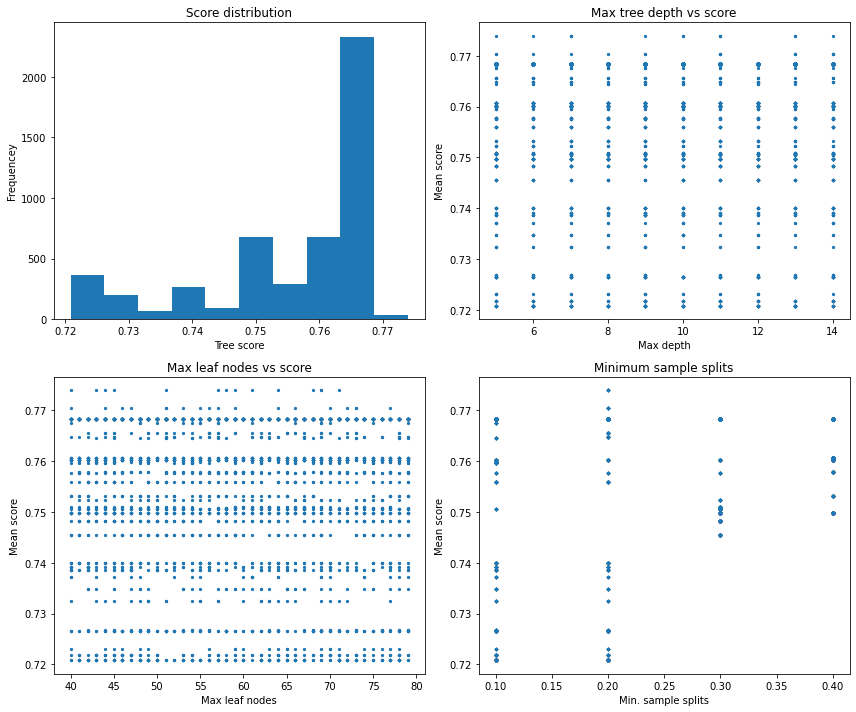

In [27]:
plt.subplots(2,2,figsize=(12,10))

plt.subplot(2, 2, 1)
plt.hist(results_3.mean_test_score)
plt.title("Score distribution")
plt.xlabel("Tree score")
plt.ylabel("Frequencey")

plt.subplot(2, 2, 2)
plt.scatter(results_3.param_max_depth, results_3.mean_test_score, s=5)
plt.xlabel("Max depth")
plt.ylabel("Mean score")
plt.title("Max tree depth vs score")

plt.subplot(2, 2, 3)
plt.scatter(results_3.param_max_leaf_nodes, results_3.mean_test_score, s=5)
plt.xlabel("Max leaf nodes")
plt.ylabel("Mean score")
plt.title("Max leaf nodes vs score")

plt.subplot(2, 2, 4)
plt.scatter(results_3.param_min_samples_split, results_3.mean_test_score, s=5)
plt.xlabel("Min. sample splits")
plt.ylabel("Mean score")
plt.title("Minimum sample splits")

plt.tight_layout()
plt.show()

### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [30]:
forrest = RandomForestClassifier(n_estimators=100)

# hyperparameter distributions
param_dist = {}
param_dist = {'max_depth': range(6, 12),
              'max_leaf_nodes': range(4,100),
              'min_samples_leaf': range(1,200)
              }

# search settings
n_iter_search = 1000
#num_jobs = 14

# set up random search with average precision-recall scorer
model_4 = RandomizedSearchCV(forrest, 
                             param_distributions=param_dist, 
                             scoring=make_scorer(metrics.average_precision_score),
                             n_iter = n_iter_search
                             )
# run and time search
start = time()
                             
model_4.fit(x_train, y_train)
print("RandomizedSearchCV took %.f min. for %d candidate"
      " parameter settings." % (((time() - start)/60), n_iter_search))

RandomizedSearchCV took 28 min. for 1000 candidate parameter settings.


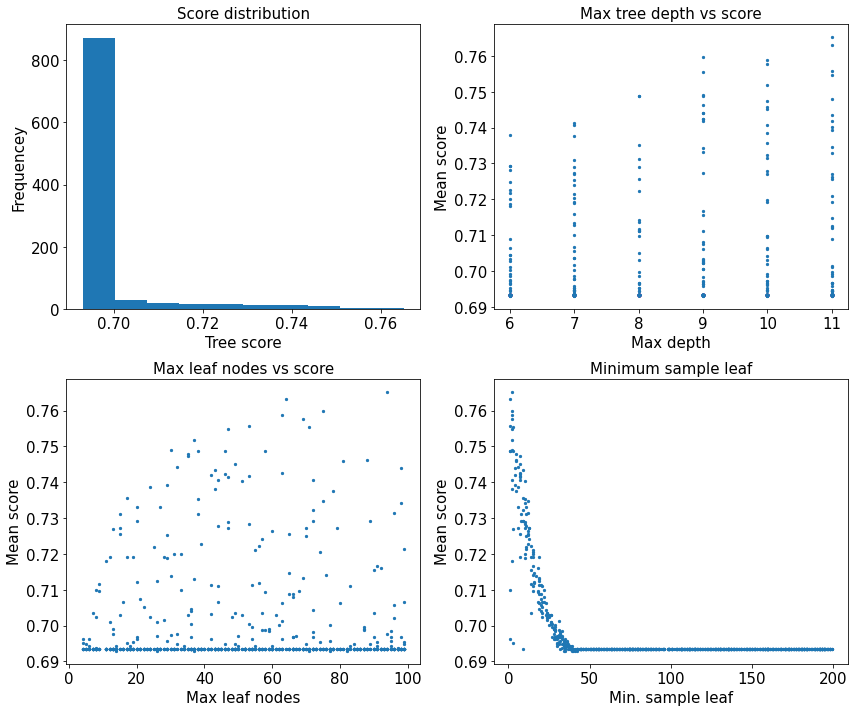

In [31]:
results_4 = pd.DataFrame(model_4.cv_results_).dropna()

plt.subplots(2,2,figsize=(12,10))

plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels

plt.subplot(2, 2, 1)
plt.hist(results_4.mean_test_score)
plt.title("Score distribution")
plt.xlabel("Tree score")
plt.ylabel("Frequencey")

plt.subplot(2, 2, 2)
plt.scatter(results_4.param_max_depth, results_4.mean_test_score, s=5)
plt.xlabel("Max depth")
plt.ylabel("Mean score")
plt.title("Max tree depth vs score")

plt.subplot(2, 2, 3)
plt.scatter(results_4.param_max_leaf_nodes, results_4.mean_test_score, s=5)
plt.xlabel("Max leaf nodes")
plt.ylabel("Mean score")
plt.title("Max leaf nodes vs score")

plt.subplot(2, 2, 4)
plt.scatter(results_4.param_min_samples_leaf, results_4.mean_test_score, s=5)
plt.xlabel("Min. sample leaf")
plt.ylabel("Mean score")
plt.title("Minimum sample leaf")

plt.tight_layout()
plt.show()

In [32]:
results_best_4 = results_4[results_4['rank_test_score'] == results_4['rank_test_score'].min()]
results_best_4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_leaf_nodes,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
735,0.372018,0.025959,0.024951,0.003147,2,94,11,"{'min_samples_leaf': 2, 'max_leaf_nodes': 94, ...",0.76308,0.784132,0.759038,0.767135,0.752726,0.765222,0.010585,1


In [33]:
model_best_4 = RandomForestClassifier(
            max_depth=10,
            max_leaf_nodes=93,
            min_samples_leaf=2,
            n_estimators=1000,
            )

model_best_4.fit(x_train, y_train)

y_predict_train_4 = model_best_4.predict(x_train)
y_predict_test_4 = model_best_4.predict(x_test)

print(classification_report(y_predict_train_4, y_train))
print(classification_report(y_predict_test_4, y_test))
print(confusion_matrix(y_predict_test_4, y_test))

              precision    recall  f1-score   support

           0       0.77      0.99      0.87       178
           1       1.00      0.91      0.95       572

    accuracy                           0.93       750
   macro avg       0.88      0.95      0.91       750
weighted avg       0.94      0.93      0.93       750

              precision    recall  f1-score   support

           0       0.30      0.58      0.40        36
           1       0.92      0.77      0.84       214

    accuracy                           0.74       250
   macro avg       0.61      0.68      0.62       250
weighted avg       0.83      0.74      0.77       250

[[ 21  15]
 [ 49 165]]


Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good.

Therefore, Random Forest algorithm is used to mitigate these problems.

## Boosting Based Algorithms

The next generation of algorithms after Random Forests are based on Boosting, known as **Gradient Boosted Machines**

The 3 types of Boosting algorithm widely used are as follows: 

1. **XGBoost**
2. **CatBoost**
3. **LightGBM**

We will be implementing **XGBoost** for our project.

In [36]:
from xgboost import XGBClassifier

In [37]:
xgb_mod = XGBClassifier() 

start = time()
xgb_mod.fit(x_train, y_train)

y_predict_train_5 = xgb_mod.predict(x_train)
y_predict_test_5 = xgb_mod.predict(x_test)

print(classification_report(y_predict_train_5, y_train))
print(classification_report(y_predict_test_5, y_test))
print(confusion_matrix(y_predict_test_5, y_test))
print((time()-start)/60)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           1       1.00      1.00      1.00       520

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

              precision    recall  f1-score   support

           0       0.49      0.50      0.49        68
           1       0.81      0.80      0.81       182

    accuracy                           0.72       250
   macro avg       0.65      0.65      0.65       250
weighted avg       0.72      0.72      0.72       250

[[ 34  34]
 [ 36 146]]
0.023048973083496092


## Model Comparison

Let's compare the results of all the models we used for classifying loans.


|Model         | Parameters |Precision|Recall|F1 score|
|--------------|------------|---------|------|--------|
|Decision Tree | Train      |1        |1     |1       |
|              | Test       |0.63     |0.65  |0.64    |
|Hyperparameter| Train      |0.73     |0.72  |0.73    |
|              | Test       |0.70     |0.69  |0.69    |
|Random Forrest| Train      |0.94     |0.93  |0.93    |
|              | Test       |0.83     |0.74  |0.77    |
|XGBoost       | Train      |1        |1     |1       |
|              | Test       |0.72     |0.72  |0.72    |